# Project: Twitter sentiment analysis

In   this   hands-on   project,   we   will   train   a   Naive   Bayes   classifier   to   predict   sentiment   from   thousands   of 
 Twitter   tweets.   This   project   could   be   practically   used   by   any   company   with   social   media   presence   to 
 automatically   predict   customer's   sentiment   (i.e.:   whether   their   customers   are   happy   or   not).   The 
 process   could   be   done   automatically   without   having   humans   manually   review   thousands   of   tweets 
 and   customer   reviews.   
 

# Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Dataset

In [4]:
data= pd.read_csv("D:/DataScience/files/train.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Exploratory Data Analysis 

Exploration: Visualizing the dataset, detect outliers, replacing a missing value and cleaning the dataset, splitting training dataset into training and testing sets and checks for any correlation among the features using heatmap.

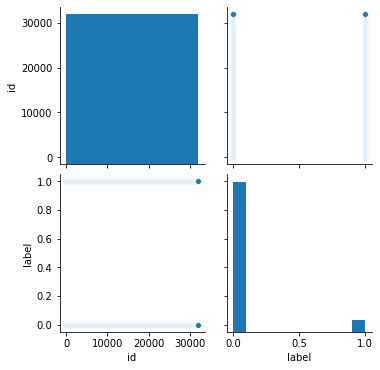

In [16]:
sns.pairplot(data)

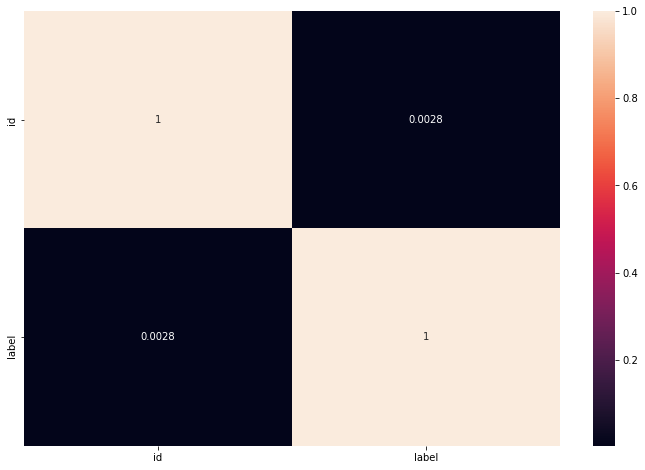

In [19]:
plt.figure(figsize=(12,8))
g=sns.heatmap(data.corr(),annot=True)

# Data Cleaning

In [6]:
import re
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a
   

In [7]:
data.tweet=data.tweet.apply(clean)
data.head()

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so ...
1,2,0,user thanks for lyft credit i can't use cause ...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
w=WordNetLemmatizer()
data.tweet=data.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
data.head()

,id,label,tweet
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user thank for lyft credit i can't use cause t...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [9]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

# Count Vectorization 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
vector.fit(data)

CountVectorizer()

In [25]:
vector.vocabulary_

{'id': 0, 'label': 1, 'tweet': 2}

In [27]:
data_vector =vector.transform(data)
data_vector.toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [29]:
df = pd.DataFrame(data_vector.toarray())
df

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1


# TFIDF Vectorization 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
new = vector.fit_transform(data.tweet)
new.shape


(31962, 35867)

In [11]:
features = vector.get_feature_names()

In [12]:
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
a,b=s.fit_sample(new,data.label)

In [13]:
print(a.shape)
print(b.shape)

(59440, 35867)
(59440,)


In [14]:
a

<59440x35867 sparse matrix of type '<class 'numpy.float64'>'
	with 882626 stored elements in Compressed Sparse Row format>

In [15]:
b.value_counts()


1    29720
0    29720
Name: label, dtype: int64